# Gauss-Seidel Method for Solving Linear Systems

The Gauss-Seidel method is an iterative technique for solving a square system of \(n\) linear equations with unknown \(x\):
\[ Ax = b \]

where:
- \(A\) is a known (n*n) matrix,
- \(x\) is the vector of unknowns,
- \(b\) is the known vector.

The method iteratively improves the solution vector until it converges to a sufficiently accurate solution.

## Algorithm

Given a system of linear equations \(Ax = b\), the Gauss-Seidel method updates each component of the solution vector as follows:

1. Initialize the solution vector $x^{(0)}$ (often with zeros).
2. For each iteration \(k = 1, 2, 3, ...):
   - For each \(i = 1, 2, ..., n\):
     $x_i^{(k+1)}$ = $\frac{1}{a_{ii}} (b_i - \sum_{j=1}^{i-1} a_{ij} x_j^{(k+1)} - \sum_{j=i+1}^{n} a_{ij} x_j^{(k)}$
3. Repeat until convergence (e.g., $\|x^{(k+1)} - x^{(k)}\|$ is sufficiently small).

The method converges if the matrix \(A\) is diagonally dominant or positive definite.


## Implementation
Create a code cell with the implementation of the Gauss-Seidel method:

In [24]:
import numpy as np

def gauss_seidel(A, b, x0, tol=1e-10, max_iterations=1000):
    """
    Solve the system of linear equations Ax = b using the Gauss-Seidel method.

    Parameters:
    A (numpy.ndarray): Coefficient matrix.
    b (numpy.ndarray): Constant vector.
    x0 (numpy.ndarray): Initial guess for the solution.
    tol (float): Tolerance for convergence.
    max_iterations (int): Maximum number of iterations.

    Returns:
    numpy.ndarray: Solution vector.
    int: Number of iterations.
    list: List of solution vectors at each iteration.
    """
    n = len(b)
    x = x0.copy()
    x_history = [x.copy()]
    for iteration in range(max_iterations):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = sum(A[i][j] * x_new[j] for j in range(i))
            sum2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - sum1 - sum2) / A[i][i]
        x_history.append(x_new.copy())
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new, iteration + 1, x_history
        # Check for divergence
        if np.linalg.norm(x_new) > 1e20:
            print("The method is diverging.")
            return x_new, iteration + 1, x_history
        x = x_new
    return x_new, max_iterations, x_history

Now, implement a function for plotting the convergenes of points and iterations. you should plot iteration against values of x's for the x's that you have saved in each iteration of gauss_seidel function.

In [25]:
import matplotlib.pyplot as plt

def plot_convergence(x_history, n_iterations):
    """
    Plot the convergence of the Gauss-Seidel method.

    Parameters:
    x_history (list): List of solution vectors at each iteration.
    n_iterations (int): Number of iterations.
    """
    x_history = np.array(x_history)
    iterations = np.arange(n_iterations + 1)

    for i in range(x_history.shape[1]):
        plt.plot(iterations, x_history[:, i], label=f'$x_{i}$')

    plt.xlabel('Iteration')
    plt.ylabel('Values of $x_i$')
    plt.title('Convergence of Gauss-Seidel Method')
    plt.legend()
    plt.grid(True)
    plt.show()

Now test your implemented functions for given equations.

Solution: [3.0954165  2.40055514 3.99898938]
Iterations: 9


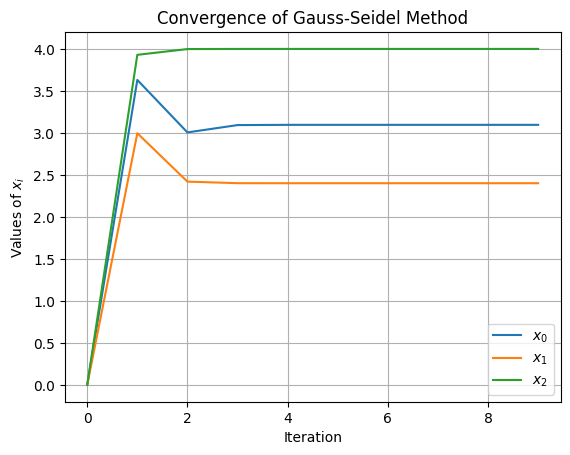

In [26]:
# Example 1
A = np.array([[5.51, 0.86, 0.22],
              [0.76, 8.86, 1.42],
              [0.03, 0.58, 5.13]], dtype=float)
b = np.array([20, 29.3, 22], dtype=float)
x0 = np.zeros_like(b)

solution, iterations, x_history = gauss_seidel(A, b, x0)
print("Solution:", solution)
print("Iterations:", iterations)

plot_convergence(x_history, iterations)

The method is diverging.
Solution: [ 8.52908641e+19 -1.70581728e+20]
Iterations: 26


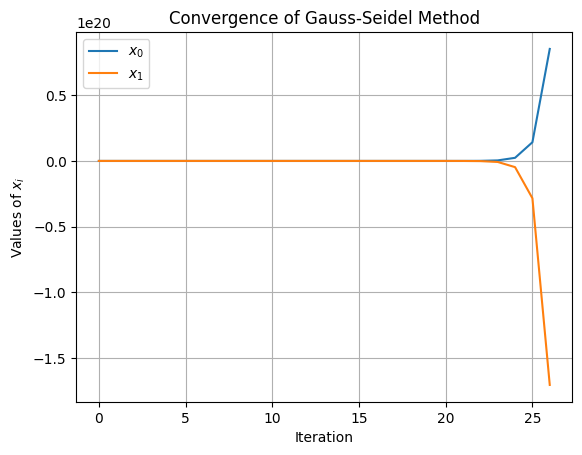

In [27]:
# Example 2:
A = np.array([[1, 3],
              [2, 1]], dtype=float)
b = np.array([5, 5], dtype=float)
x0 = np.zeros_like(b)

solution, iterations, x_history = gauss_seidel(A, b, x0)
print("Solution:", solution)
print("Iterations:", iterations)

plot_convergence(x_history, iterations)

### Convergence of the Gauss-Seidel Method:

The Gauss-Seidel method does not always converge to the solution. The convergence of the Gauss-Seidel method depends on specific properties of the coefficient matrix \(A\):

1. **Diagonally Dominant Matrix**:
   - A matrix \(A\) is diagonally dominant if for every row
   - The method is guaranteed to converge if \(A\) is strictly diagonally dominant, meaning the inequality is strict for at least one \(i\).

2. **Positive Definite Matrix**:
   - A matrix \(A\) is positive definite if for all non-zero vectors \(x\):
   - The method converges if \(A\) is symmetric and positive definite.

### Example 2:
In Example 2, the matrix \(A\) is neither diagonally dominant nor positive definite:


- The matrix \(A\) is:
  
  \begin{bmatrix}
  1 & 3 \\
  2 & 1 \\
  \end{bmatrix}
  
- It is not diagonally dominant because: |1| < |3| and |1| < |2|
- It is not positive definite either, as it is not symmetric and does not satisfy the positive definite condition.